In [69]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
from wordcloud import WordCloud
from wordcloud import STOPWORDS
#originalDf = pd.io.json.read_json('data/goodreads_reviews_comics_graphic.json',lines=True) 
#r =ProfileReport(df)
#r.to_file('data_eda.html')
#text analysis
# ->word association with good or bads
# ->number of comments as a funciton of other reviews
#duration and effect on other things (rating, votes, etc)
df = originalDf.copy()
#custom is number function
def is_num(n):
    if n.isdigit():
        return True
    try:
        num = float(n)
    except:
        return False
    return True
def get_word_dist(df):
    words = df[['review_id','review_text']].set_index('review_id',drop=True).to_dict()['review_text']
    ratings = df[['review_id','rating']].set_index('review_id',drop=True).to_dict()['rating']
    #drop the numbers, and clean out punctuation
    punctuation= """!()-[]{};:'"\, <>./?@#$%^&*_~+|"""
    #now, UID:bag of words for each review
    words = {k:[w.strip(punctuation).lower() for w in v.split() if not is_num(w.strip(punctuation))] for k,v in words.items()}
    all_words = [(ratings[k],v) for k,vv in words.items() for v in vv]
    word_rats = {'ratings':[x[0] for x in all_words],'word':[x[1] for x in all_words]}
    word_ratings = pd.DataFrame(word_rats)
    mean_rat = word_ratings.groupby('word').mean()['ratings'].to_dict()
    count_rat = word_ratings.groupby('word').count()['ratings'].to_dict()
    word_ratings['mean'] = word_ratings['word'].apply(lambda x: mean_rat[x])
    word_ratings['count'] = word_ratings['word'].apply(lambda x: count_rat[x])
    return word_ratings.drop('ratings',axis=1).drop_duplicates()
#df = get_word_dist(df)
#df.to_csv('word_dist.csv')
word_df = pd.read_csv('word_dist.csv').drop('Unnamed: 0',axis=1)

In [70]:
word_df.describe()

,mean,count
count,634729.000000,6.347290e+05
mean,3.786642,7.666840e+01
std,0.959408,5.243051e+03
min,0.000000,1.000000e+00
25%,3.000000,1.000000e+00
50%,4.000000,1.000000e+00
75%,4.333333,3.000000e+00
max,5.000000,2.456777e+06


In [71]:
#clearly most words only occur once time, so we'll drop typical stop words (i,if,a,the,)
#as we assume they are meaningless, and will drop any word that doesnt occur at least 5 times
word_df = word_df[(word_df['count']>=5) & ~(word_df['word'].isin(STOPWORDS))]

In [72]:
word_df.describe()

,mean,count
count,124050.000000,124050.000000
mean,3.805600,204.725256
std,0.466388,2366.312976
min,0.000000,5.000000
25%,3.583333,7.000000
50%,3.833333,14.000000
75%,4.075269,43.000000
max,5.000000,267520.000000


<IPython.core.display.Javascript object>


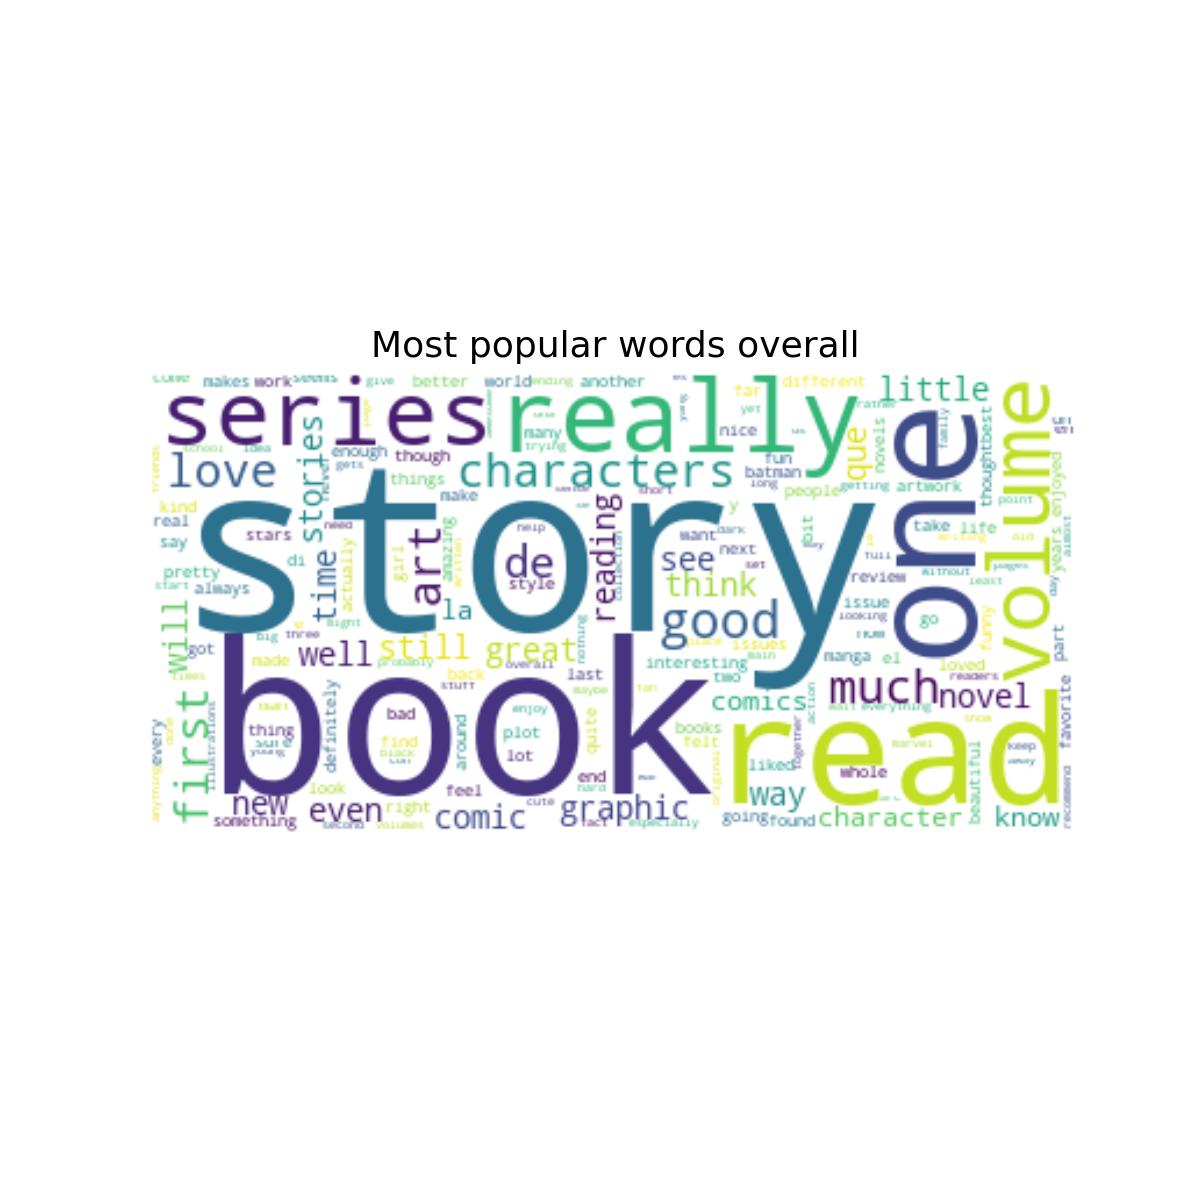

In [73]:
wc = WordCloud(background_color="white", max_words=1000,)
# generate word cloud
counts = word_df[['word','count']].set_index('word',drop=True).to_dict()['count']
wc.generate_from_frequencies(counts)
plt.figure(figsize=(6,6))
plt.title('Most popular words overall',fontsize=13)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [78]:
freq_words = word_df[word_df['count']>100].sort_values(by='mean')

<IPython.core.display.Javascript object>


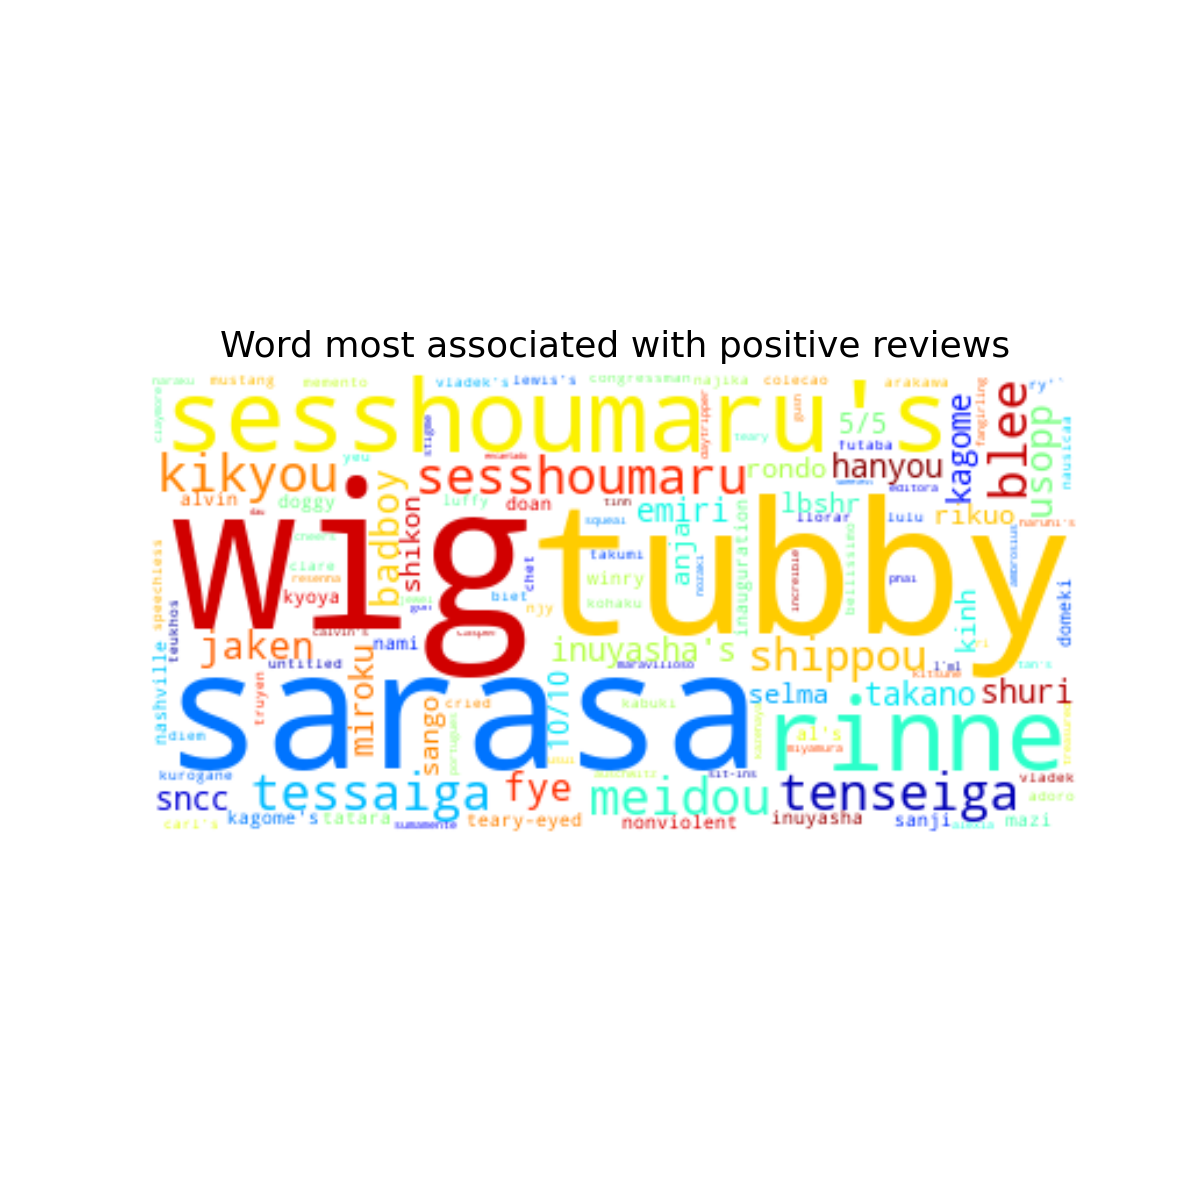

In [79]:
wc = WordCloud(background_color="white", max_words=1000,colormap='jet')
# generate word cloud
counts = freq_words[['word','mean']].set_index('word',drop=True).to_dict()['mean']
wc.generate_from_frequencies(counts)
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation="bilinear")
plt.title('Word most associated with positive reviews', fontsize=13)
plt.axis("off")
plt.show()

In [80]:
freq_words[freq_words['word']=='tubby']

,word,mean,count
235332,tubby,4.92069,290


<IPython.core.display.Javascript object>


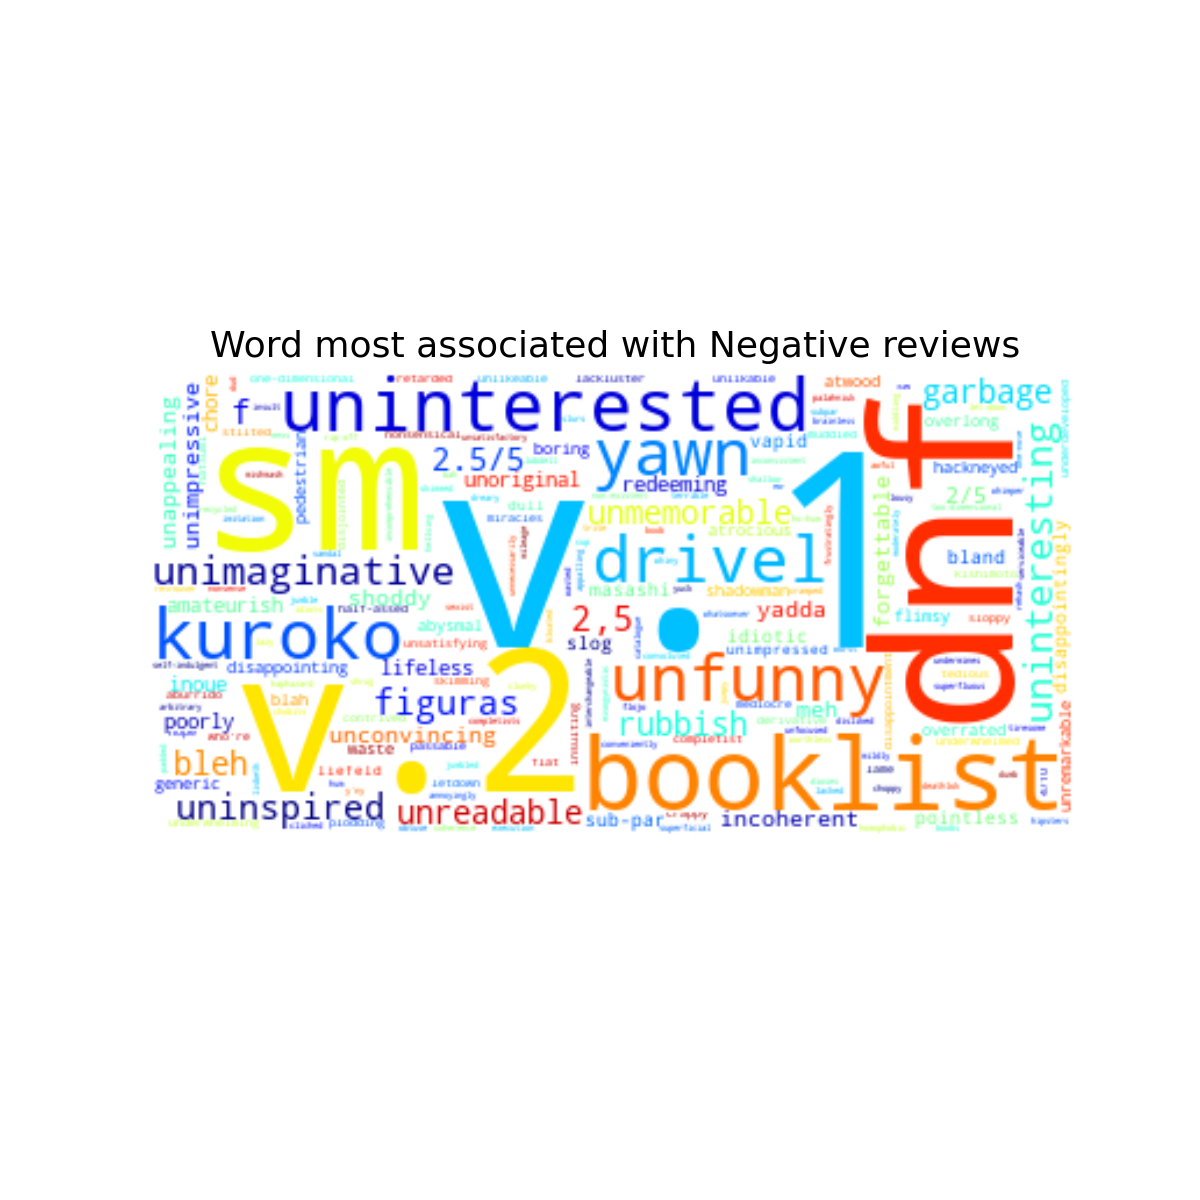

In [81]:
freq_words['mean'] = freq_words['mean'].apply(lambda x: 5-x)
wc = WordCloud(background_color="white", max_words=1000,colormap='jet')
# generate word cloud
counts = freq_words[['word','mean']].set_index('word',drop=True).to_dict()['mean']
wc.generate_from_frequencies(counts)
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation="bilinear")
plt.title('Word most associated with Negative reviews', fontsize=13)
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


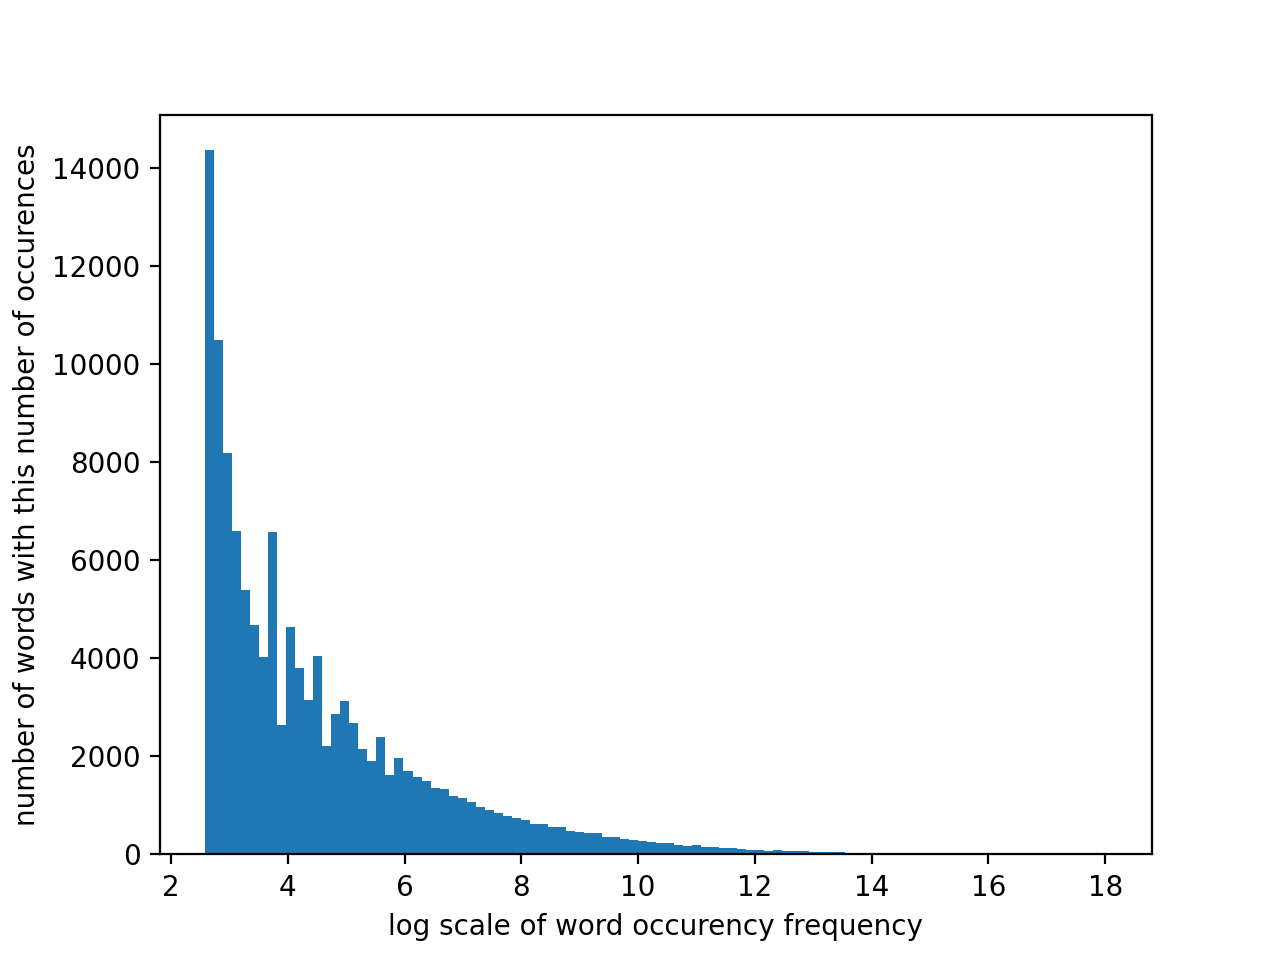

Text(0, 0.5, 'number of words with this number of occurences')

In [64]:
plt.figure()

ax =word_df['count'].apply(lambda x: np.log2(x+1)).plot.hist(bins=100)
ax.set_xlabel('log scale of word occurency frequency')
ax.set_ylabel('number of words with this number of occurences')

,word,mean,count
235332,tubby,4.92069,290
